In [1]:
%load_ext autoreload
%autoreload 2

# Hyperparameters

In [2]:
v_dim = 320 # 20 * 16
h_dim = 100

# Load AlphaDigit Data

In [3]:
import torch
from dataset.AlphaDigit import AlphaDigit
from torch.utils.data import DataLoader

In [82]:
dataset = AlphaDigit(label=[3])
train_loader = DataLoader(dataset, batch_size=1, shuffle=True)

# Build RBM model

In [84]:
from model.RBMLit import RBMLit
rbm = RBMLit(v_dim=320, h_dim=100, lr=0.1)

# Train

In [85]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
logger = CSVLogger('.')
trainer = Trainer(accelerator='gpu', max_epochs=100, enable_progress_bar=True, logger=logger, log_every_n_steps=1)
trainer.fit(rbm, train_dataloaders=train_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type | Params
-------------------------------
0 | model | RBM  | 32.4 K
-------------------------------
32.4 K    Trainable params
0         Non-trainable params
32.4 K    Total params
0.130     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [69]:
# rbm = RBMLit.load_from_checkpoint(v_dim=320, h_dim=100, checkpoint_path='./lightning_logs/version_7/checkpoints/epoch=99-step=2200.ckpt')
# rbm = RBMLit.load_from_checkpoint(v_dim=320, h_dim=100, checkpoint_path='./lightning_logs/version_16/checkpoints/epoch=99-step=3900.ckpt')

# Generation

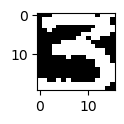

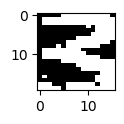

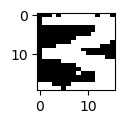

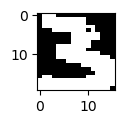

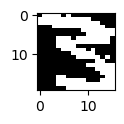

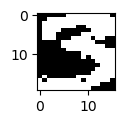

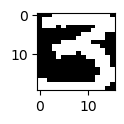

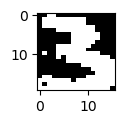

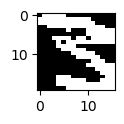

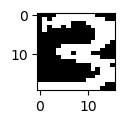

In [102]:
from utils import *
generate_image(rbm, 10, 10, (320,))